# **IBM Applied Data Science Capstone Project**
## **Hyderabad City: Locality Recommendation System**
### **Battle of the Neighborhoods**

**1.Import the required Libraries**

In [1]:
#Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

**2.Read the Main dataset from the csv file**

In [2]:
df = pd.read_csv('ghmc_hyd_data.csv')
df.head(10)

,Zone,Circle,Ward,Latitude,Longitude,City,Avg_Rent,Population
0,LB Nagar (East Zone),Kapra,Kapra,17.488731,78.568384,Hyderabad,12000.0,44149
1,LB Nagar (East Zone),Kapra,Dr. AS Rao Nagar,17.479077,78.550862,Hyderabad,12500.0,45264
2,LB Nagar (East Zone),Kapra,Cherlapally,17.464962,78.593184,Hyderabad,12000.0,57747
3,LB Nagar (East Zone),Kapra,Meerpet HB Colony,17.452821,78.564846,Hyderabad,8500.0,67130
4,LB Nagar (East Zone),Kapra,Mallapur,17.446885,78.574279,Hyderabad,16000.0,57688
5,LB Nagar (East Zone),Kapra,Nacharam,17.431458,78.559739,Hyderabad,8000.0,52167
6,LB Nagar (East Zone),Uppal,Chilukanagar,17.422323,78.561234,Hyderabad,10000.0,59061
7,LB Nagar (East Zone),Uppal,Habsiguda,17.407221,78.543685,Hyderabad,25000.0,75227
8,LB Nagar (East Zone),Uppal,Ramanthapur,17.392947,78.540388,Hyderabad,9500.0,57417
9,LB Nagar (East Zone),Uppal,Uppal,17.398729,78.558043,Hyderabad,13000.0,68115


**3.Create Population and Rent Dataframe from the Main Dataframe**

In [3]:
hyd_population = pd.DataFrame(df[['Zone','Ward','Population']])

In [4]:
hyd_population.head()

,Zone,Ward,Population
0,LB Nagar (East Zone),Kapra,44149
1,LB Nagar (East Zone),Dr. AS Rao Nagar,45264
2,LB Nagar (East Zone),Cherlapally,57747
3,LB Nagar (East Zone),Meerpet HB Colony,67130
4,LB Nagar (East Zone),Mallapur,57688


In [5]:
hyd_population.to_csv('population_dataset.csv')

In [6]:
hyd_rent = pd.DataFrame(df[['Zone','Ward','Avg_Rent']])

In [7]:
hyd_rent.head()

,Zone,Ward,Avg_Rent
0,LB Nagar (East Zone),Kapra,12000.0
1,LB Nagar (East Zone),Dr. AS Rao Nagar,12500.0
2,LB Nagar (East Zone),Cherlapally,12000.0
3,LB Nagar (East Zone),Meerpet HB Colony,8500.0
4,LB Nagar (East Zone),Mallapur,16000.0


In [8]:
hyd_rent.to_csv('hyd_rent_dataset.csv')

**4.Map the Wards, Zone-wise on the Hyderabad City Map**

In [9]:
unique_zones_of_hyderabad = df['Zone'].unique().tolist()
unique_zones_of_hyderabad

['LB Nagar (East Zone)',
 'Charminar (South Zone)',
 'Khairatabad (Central Zone)',
 'Secunderabad (NE Zone)',
 'Serilingampally (West Zone)',
 'Kukatpally (North Zone)']

In [10]:
hyd_zones = pd.DataFrame(df[['Zone','Ward','Latitude','Longitude']])
hyd_zones.head()

,Zone,Ward,Latitude,Longitude
0,LB Nagar (East Zone),Kapra,17.488731,78.568384
1,LB Nagar (East Zone),Dr. AS Rao Nagar,17.479077,78.550862
2,LB Nagar (East Zone),Cherlapally,17.464962,78.593184
3,LB Nagar (East Zone),Meerpet HB Colony,17.452821,78.564846
4,LB Nagar (East Zone),Mallapur,17.446885,78.574279


In [11]:
hyd_latitude = df['Latitude'].mean()
hyd_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Hyderabad are : ",hyd_latitude,hyd_longitude)

Latitude and Longitude of Hyderabad are :  17.412017666666667 78.47211160000002


In [12]:
CLIENT_ID = 'EXHIYSOUKY13CJMQ1KJZ4CBWNFU5CSTKC5RK4JSPSIC5RD2N'
CLIENT_SECRET = 'LJZG0BQCMQUVUISOGNRX3PGDLWNCXVBI4OD5TM5BV43P2ZCX'
VERSION = '20180606'
LIMIT = 150

In [13]:
zone_colors ={}
for i in unique_zones_of_hyderabad:
    zone_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [14]:
zone_colors

{'LB Nagar (East Zone)': '#B187A2',
 'Charminar (South Zone)': '#7C9D1C',
 'Khairatabad (Central Zone)': '#25124B',
 'Secunderabad (NE Zone)': '#05CD0F',
 'Serilingampally (West Zone)': '#B60A72',
 'Kukatpally (North Zone)': '#C106B0'}

In [15]:
hyderabad_map = folium.Map(location=[hyd_latitude,hyd_longitude],zoom_start=12,control_scale=True)

In [16]:
for lat,lng,zone,ward in zip(df['Latitude'],
                           df['Longitude'],
                           df['Zone'],
                           df['Ward']):
    label_text = zone + ' - ' + ward
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=zone_colors[zone],
    fill=True,
    fill_color = zone_colors[zone],
    fill_opacity=0.7).add_to(hyderabad_map)

In [17]:
hyderabad_map

In [18]:
hyderabad_map.save('hydmap.html')

**5.Explore the *Venues* near each ward in the city of Hyderabad using the *Foursquare API***

In [19]:
def getNearbyVenues(names, zone, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, zone, lat, lng in zip(names, zone, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            zone,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Ward',
                             'Zone',
                             'Ward Latitude', 
                             'Ward Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [20]:
hyd_venues = getNearbyVenues(names=df['Ward'],latitudes=df['Latitude'],longitudes=df['Longitude'],zone=df['Zone'])

Fetching venues for :  Kapra
Fetching venues for :  Dr. AS Rao Nagar
Fetching venues for :  Cherlapally
Fetching venues for :  Meerpet HB Colony
Fetching venues for :  Mallapur
Fetching venues for :  Nacharam
Fetching venues for :  Chilukanagar
Fetching venues for :  Habsiguda
Fetching venues for :  Ramanthapur
Fetching venues for :  Uppal
Fetching venues for :  Nagole
Fetching venues for :  Mansoorabad
Fetching venues for :  Hayathnagar
Fetching venues for :  BN Reddy Nagar
Fetching venues for :  Vanasthalipuram
Fetching venues for :  Hastinapuram
Fetching venues for :  Champapet
Fetching venues for :  Lingojiguda
Fetching venues for :  Saroornagar
Fetching venues for :  Ramakrishna Puram
Fetching venues for :  Kothapet
Fetching venues for :  Chaitanyapuri
Fetching venues for :  Gaddiannaram
Fetching venues for :  Saidabad
Fetching venues for :  Moosarambagh
Fetching venues for :  Old Malakpet
Fetching venues for :  Akbarbagh
Fetching venues for :  Azampura
Fetching venues for :  Chav

In [21]:
print("Total number of venues found in Hyderabad are : ",hyd_venues.shape[0])

Total number of venues found in Hyderabad are :  613


**5.1.The Dataframe with the *Venue* data for each ward with the coordinates (Latitude and Longitude) and *Venue Categories***

In [22]:
hyd_venues.head(5)

,Ward,Zone,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kapra,LB Nagar (East Zone),17.488731,78.568384,MedPlus,17.488267,78.569265,Pharmacy
1,Dr. AS Rao Nagar,LB Nagar (East Zone),17.479077,78.550862,The Coffee Cup,17.483180,78.552104,Café
2,Dr. AS Rao Nagar,LB Nagar (East Zone),17.479077,78.550862,Swagath Grand,17.482022,78.553261,Indian Restaurant
3,Dr. AS Rao Nagar,LB Nagar (East Zone),17.479077,78.550862,Ushodaya Supermarket,17.482001,78.553056,Department Store
4,Dr. AS Rao Nagar,LB Nagar (East Zone),17.479077,78.550862,Foodworld,17.481645,78.554110,Department Store


In [23]:
hyd_venues.groupby('Venue Category').count()['Ward'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       60
ATM                     30
Bakery                  26
Café                    25
Department Store        24
Coffee Shop             20
Fast Food Restaurant    17
Restaurant              16
Clothing Store          15
Pharmacy                14
Name: Ward, dtype: int64

In [24]:
print("Total number of unique categories in Hyderabad are : ",len(hyd_venues['Venue Category'].unique()))

Total number of unique categories in Hyderabad are :  132


**5.2.Retrieve the Number of *Venues* per Ward**

In [25]:
individual_hyd_venue_count = hyd_venues.groupby(['Zone','Ward'])['Zone'].count().to_frame()

In [26]:
individual_hyd_venue_count

Zone
Zone                        Ward                  
Charminar (South Zone)      Akbarbagh            4
                            Attapur              5
                            Azampura             3
                            Barkas               2
                            Chandrayangutta      2
...                                            ...
Serilingampally (West Zone) Rahamathnagar        2
                            Ramachandrapuram     3
                            Serilingampally      4
                            Vengalrao Nagar      3
                            Yousufguda           7

[129 rows x 1 columns]

In [27]:
individual_hyd_venue_count.rename(columns={'Zone':'NumberOfVenues'},inplace=True)

In [28]:
individual_hyd_venue_count.reset_index(inplace=True)

In [29]:
individual_hyd_venue_count

,Zone,Ward,NumberOfVenues
0,Charminar (South Zone),Akbarbagh,4
1,Charminar (South Zone),Attapur,5
2,Charminar (South Zone),Azampura,3
3,Charminar (South Zone),Barkas,2
4,Charminar (South Zone),Chandrayangutta,2
...,...,...,...
124,Serilingampally (West Zone),Rahamathnagar,2
125,Serilingampally (West Zone),Ramachandrapuram,3
126,Serilingampally (West Zone),Serilingampally,4
127,Serilingampally (West Zone),Vengalrao Nagar,3


**6.Graphically Visualize the Ward(s) with the highest *Venue* count**

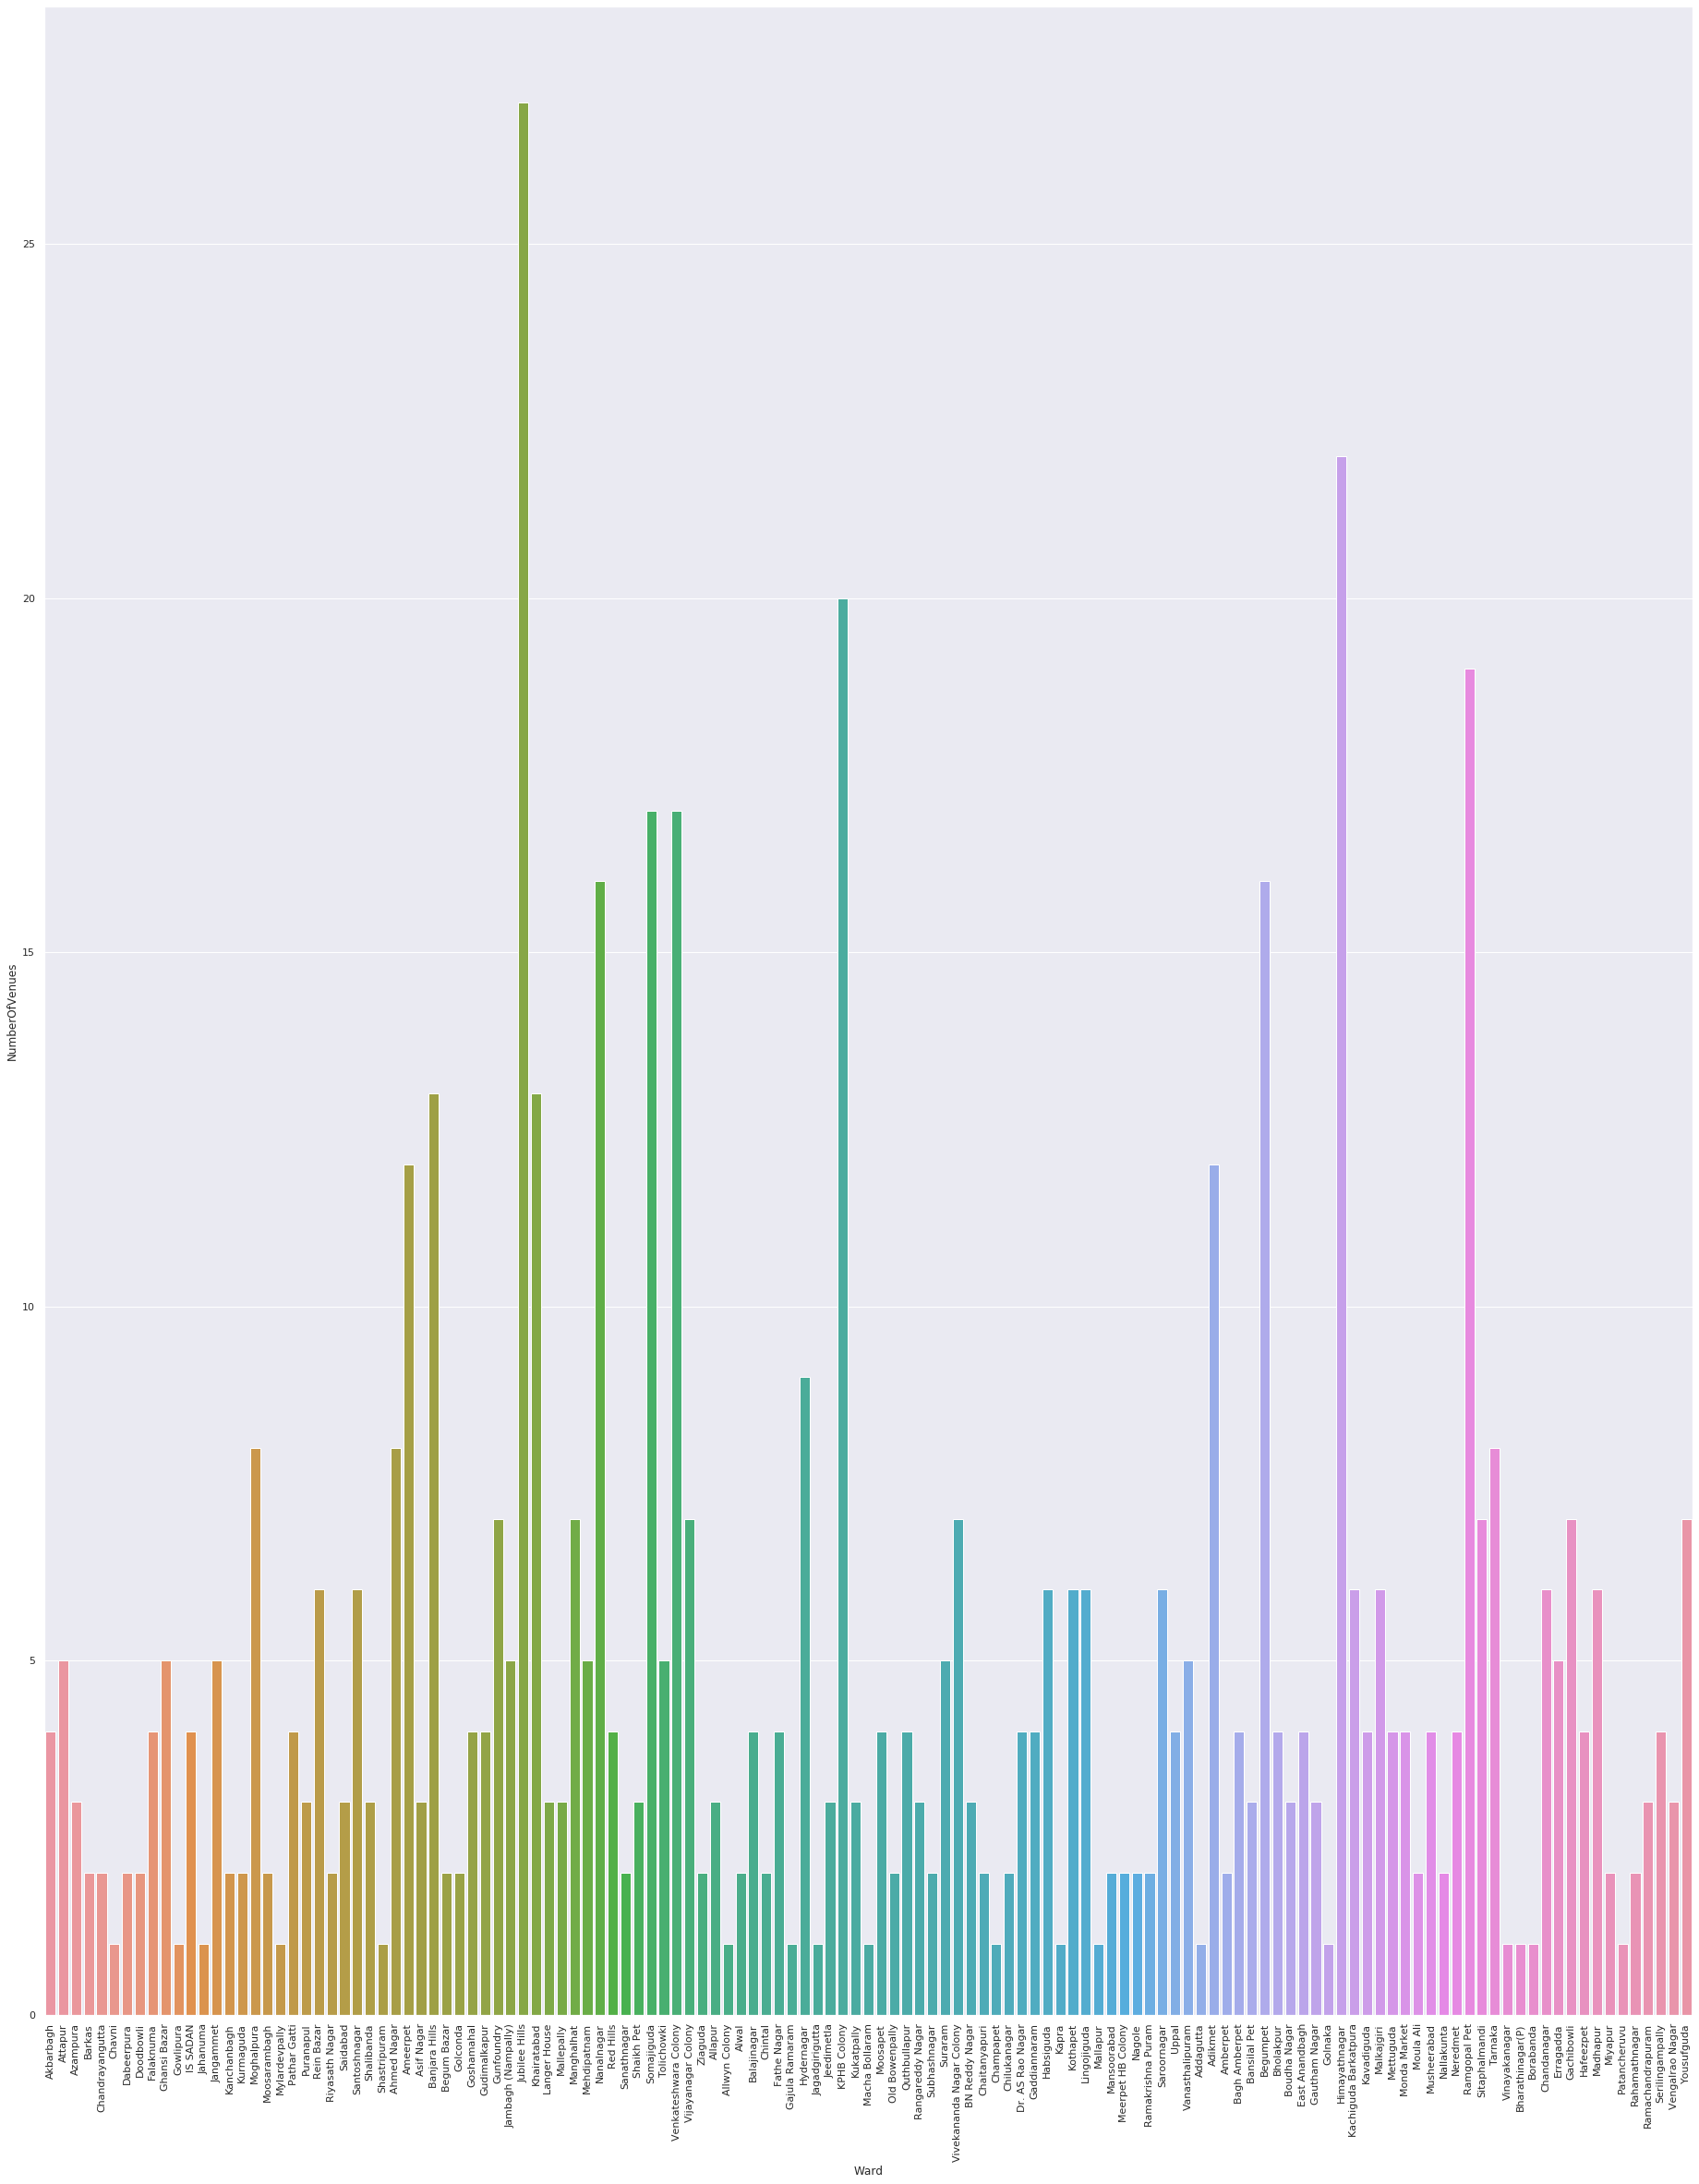

In [30]:
sns.set(rc={'figure.figsize':(32,40)})
plot = sns.barplot(x='Ward',y='NumberOfVenues',data=individual_hyd_venue_count)
plot.set_xticklabels(individual_hyd_venue_count['Ward'],rotation=90)
fig = plot.get_figure()
fig.savefig("output.png")

From the above graph we notice that the Wards with the highest *Venue* count are: Jambagh (Nampally) and Himayathnagar


**7.Explore the *Venues* in the popular ward: Ameerpet**

In [31]:
hyd_venues[hyd_venues['Ward']=='Ameerpet']

,Ward,Zone,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
260,Ameerpet,Khairatabad (Central Zone),17.437846,78.448448,Blue Fox,17.437054,78.445912,Indian Restaurant
261,Ameerpet,Khairatabad (Central Zone),17.437846,78.448448,Santosh Dhaba,17.439442,78.448259,Vegetarian / Vegan Restaurant
262,Ameerpet,Khairatabad (Central Zone),17.437846,78.448448,Minerva Coffee Shop,17.437295,78.446074,Indian Restaurant
263,Ameerpet,Khairatabad (Central Zone),17.437846,78.448448,Sher-e-Punjab Dhaba,17.438454,78.452262,Indian Restaurant
264,Ameerpet,Khairatabad (Central Zone),17.437846,78.448448,eatworld,17.438240,78.450080,Fast Food Restaurant
265,Ameerpet,Khairatabad (Central Zone),17.437846,78.448448,Subway,17.441701,78.446994,Sandwich Place
266,Ameerpet,Khairatabad (Central Zone),17.437846,78.448448,Cafe Coffee Day,17.441696,78.446980,Café
267,Ameerpet,Khairatabad (Central Zone),17.437846,78.448448,Shriji Rasoi,17.435856,78.451174,Fast Food Restaurant
268,Ameerpet,Khairatabad (Central Zone),17.437846,78.448448,Walk 'n' Eat,17.441152,78.448559,Food Court
269,Ameerpet,Khairatabad (Central Zone),17.437846,78.448448,Naivedyam,17.435425,78.451929,Indian Restaurant


**8.Compare Venues (based on a common scale) using One Hot Encoding**

In [32]:
hyd_venues_onehot = pd.get_dummies(hyd_venues[['Venue Category']])

In [33]:
hyd_venues_onehot

,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Afghan Restaurant,Venue Category_African Restaurant,Venue Category_American Restaurant,Venue Category_Arcade,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,...,Venue Category_Surf Spot,Venue Category_Tailor Shop,Venue Category_Tea Room,Venue Category_Temple,Venue Category_Thai Restaurant,Venue Category_Tourist Information Center,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wings Joint,Venue Category_Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
hyd_venues_onehot['Ward'] = hyd_venues['Ward']
hyd_venues_grouped = hyd_venues_onehot.groupby('Ward').mean().reset_index()
hyd_venues_grouped

,Ward,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Afghan Restaurant,Venue Category_African Restaurant,Venue Category_American Restaurant,Venue Category_Arcade,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,...,Venue Category_Surf Spot,Venue Category_Tailor Shop,Venue Category_Tea Room,Venue Category_Temple,Venue Category_Thai Restaurant,Venue Category_Tourist Information Center,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wings Joint,Venue Category_Women's Store
0,Addagutta,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0
1,Adikmet,0.000000,0.0,0.0,0.0,0.0,0.0,0.083333,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0
2,Ahmed Nagar,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.125,0.0,0.0
3,Akbarbagh,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0
4,Allapur,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Vijayanagar Colony,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0
125,Vinayakanagar,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0
126,Vivekananda Nagar Colony,0.000000,0.0,0.0,0.0,0.0,0.0,0.142857,0.142857,0.0,...,0.142857,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0
127,Yousufguda,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0


In [35]:
number_of_top_venues = 5

In [36]:
for wd in hyd_venues_grouped['Ward']:
    print('---------',wd,'---------')
    temp = hyd_venues_grouped[hyd_venues_grouped['Ward'] == wd].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Addagutta ---------
                                Venue  Frequency
0     Venue Category_Department Store        1.0
1  Venue Category_Monument / Landmark        0.0
2           Venue Category_Playground        0.0
3             Venue Category_Platform        0.0
4          Venue Category_Pizza Place        0.0


--------- Adikmet ---------
                              Venue  Frequency
0     Venue Category_Ice Cream Shop       0.17
1                Venue Category_Gym       0.17
2  Venue Category_Electronics Store       0.08
3  Venue Category_Convenience Store       0.08
4  Venue Category_Indian Restaurant       0.08


--------- Ahmed Nagar ---------
                                          Venue  Frequency
0              Venue Category_Indian Restaurant       0.38
1                    Venue Category_Pizza Place       0.25
2  Venue Category_Vegetarian / Vegan Restaurant       0.12
3                          Venue Category_Hotel       0.12
4                           Venue C

To successfully analyze the wards and their most busy *venues* we retrieve the frequency of the top 5 venues in each ward. We then create a dataframe with the 10 most common venues per ward. This will help us in creating the recommender system based on the parameter: ***venue category***

In [37]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [38]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Ward']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ward_venues_sorted = pd.DataFrame(columns=columns)
ward_venues_sorted['Ward'] = hyd_venues_grouped['Ward']

for ind in np.arange(hyd_venues_grouped.shape[0]):
    ward_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hyd_venues_grouped.iloc[ind, :], number_of_top_venues)

ward_venues_sorted.head()

,Ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Addagutta,Venue Category_Department Store,Venue Category_Fried Chicken Joint,Venue Category_Dhaba,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Electronics Store,Venue Category_Ethiopian Restaurant,Venue Category_Falafel Restaurant,Venue Category_Farmers Market,Venue Category_Fast Food Restaurant
1,Adikmet,Venue Category_Ice Cream Shop,Venue Category_Gym,Venue Category_Convenience Store,Venue Category_Sandwich Place,Venue Category_Electronics Store,Venue Category_Indian Restaurant,Venue Category_Asian Restaurant,Venue Category_Café,Venue Category_Coffee Shop,Venue Category_Clothing Store
2,Ahmed Nagar,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Hotel,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fast Food Restaurant
3,Akbarbagh,Venue Category_Department Store,Venue Category_Restaurant,Venue Category_Gym,Venue Category_Irani Cafe,Venue Category_Farmers Market,Venue Category_Food & Drink Shop,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fast Food Restaurant
4,Allapur,Venue Category_ATM,Venue Category_Pharmacy,Venue Category_Train Station,Venue Category_Farmers Market,Venue Category_Food & Drink Shop,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fast Food Restaurant,Venue Category_Ethiopian Restaurant


In [39]:
ward_venues_sorted.shape

(129, 11)

**9.Proceed to cluster the Venues. To achieve this, we use K-Means Clustering**

**-Find the Optimal K value for Clustering: Use the Elbow Method**

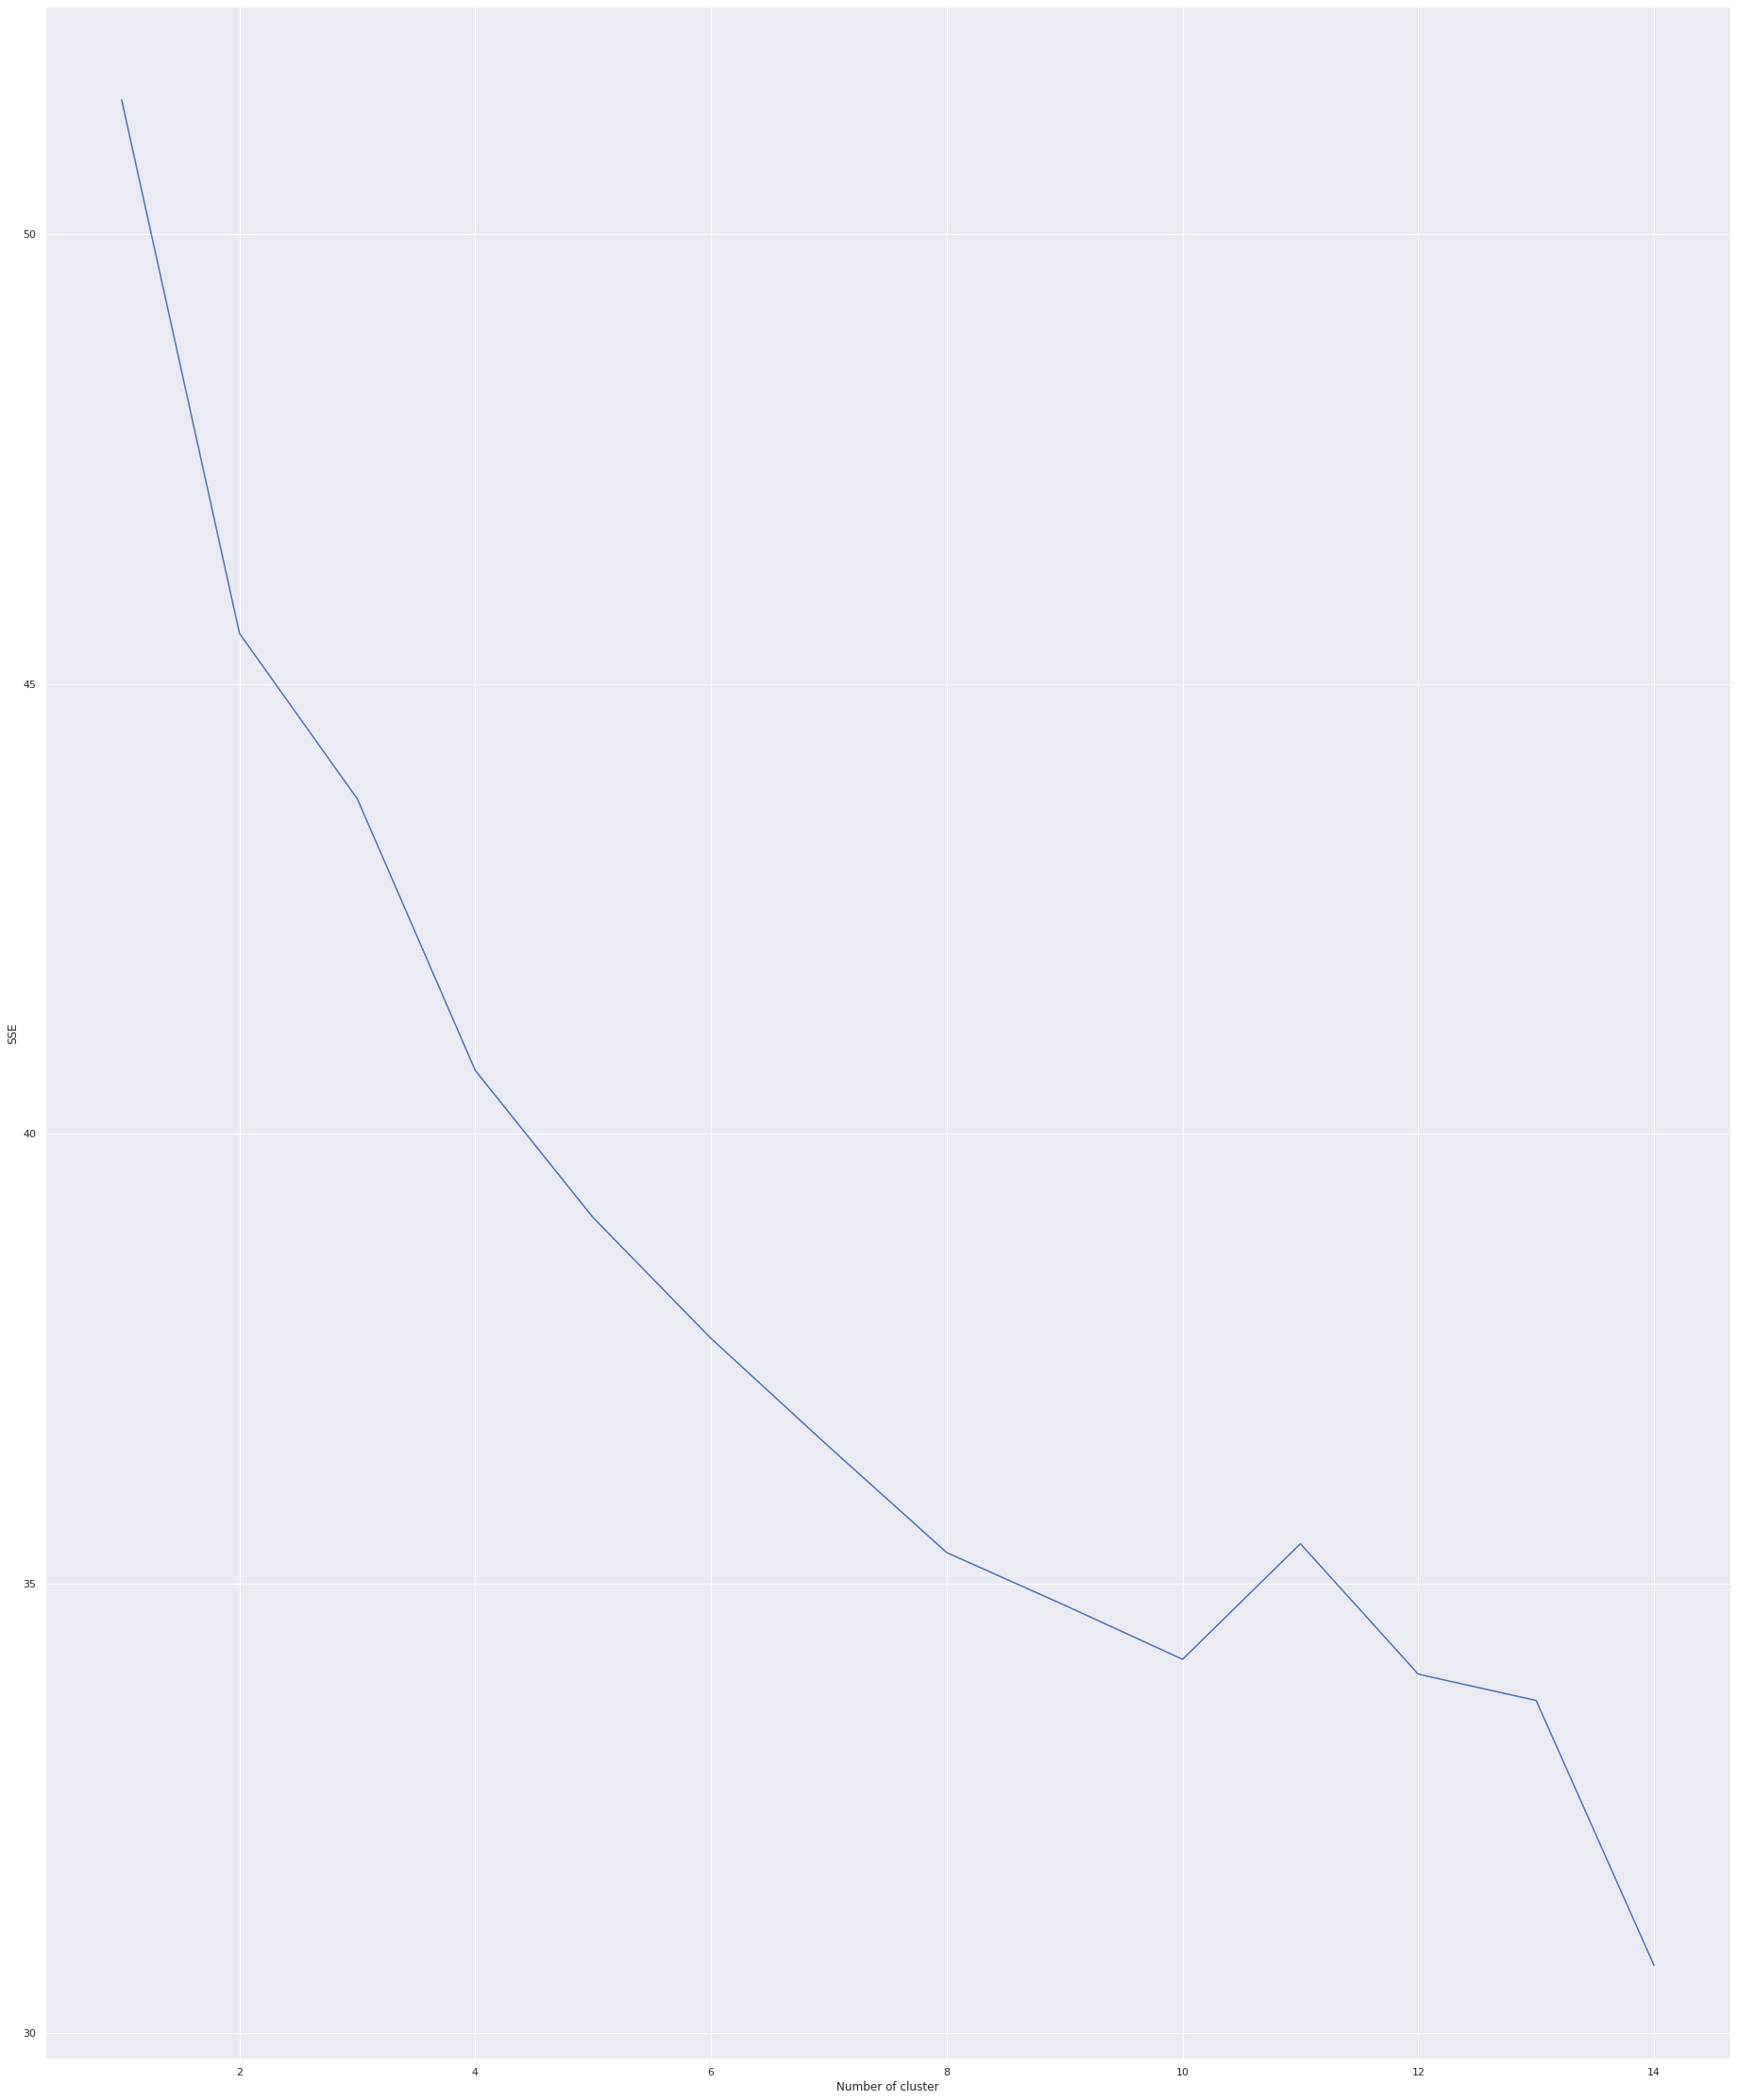

<Figure size 2304x2880 with 0 Axes>

In [40]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(hyd_venues_grouped.drop('Ward',axis=1))
    hyd_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
plt.savefig('plt.png')


The Optimal Value for No. of Clusters is 4

In [41]:
kmeans = KMeans(n_clusters=4,random_state=0)

In [42]:
kmeans.fit(hyd_venues_grouped.drop('Ward',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [43]:
hyd_venues_grouped['Cluster'] = kmeans.labels_

In [44]:
hyd_venues_grouped.groupby('Cluster')['Ward'].count()

Cluster
0    26
1    32
2    16
3    55
Name: Ward, dtype: int64

In [45]:
hyd_venues_grouped.columns

Index(['Ward', 'Venue Category_ATM', 'Venue Category_Accessories Store',
       'Venue Category_Afghan Restaurant', 'Venue Category_African Restaurant',
       'Venue Category_American Restaurant', 'Venue Category_Arcade',
       'Venue Category_Asian Restaurant', 'Venue Category_Athletics & Sports',
       'Venue Category_Auto Garage',
       ...
       'Venue Category_Tailor Shop', 'Venue Category_Tea Room',
       'Venue Category_Temple', 'Venue Category_Thai Restaurant',
       'Venue Category_Tourist Information Center',
       'Venue Category_Train Station',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Wings Joint', 'Venue Category_Women's Store',
       'Cluster'],
      dtype='object', length=134)

In [46]:
ward_venues_sorted = ward_venues_sorted.merge(hyd_venues_grouped,on='Ward')

In [47]:
ward_venues_sorted.head()

,Ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Tailor Shop,Venue Category_Tea Room,Venue Category_Temple,Venue Category_Thai Restaurant,Venue Category_Tourist Information Center,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wings Joint,Venue Category_Women's Store,Cluster
0,Addagutta,Venue Category_Department Store,Venue Category_Fried Chicken Joint,Venue Category_Dhaba,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Electronics Store,Venue Category_Ethiopian Restaurant,Venue Category_Falafel Restaurant,Venue Category_Farmers Market,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,3
1,Adikmet,Venue Category_Ice Cream Shop,Venue Category_Gym,Venue Category_Convenience Store,Venue Category_Sandwich Place,Venue Category_Electronics Store,Venue Category_Indian Restaurant,Venue Category_Asian Restaurant,Venue Category_Café,Venue Category_Coffee Shop,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,3
2,Ahmed Nagar,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Hotel,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.125,0.0,0.0,0
3,Akbarbagh,Venue Category_Department Store,Venue Category_Restaurant,Venue Category_Gym,Venue Category_Irani Cafe,Venue Category_Farmers Market,Venue Category_Food & Drink Shop,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,1
4,Allapur,Venue Category_ATM,Venue Category_Pharmacy,Venue Category_Train Station,Venue Category_Farmers Market,Venue Category_Food & Drink Shop,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fast Food Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.000,0.0,0.0,3


In [48]:
ward_venues_sorted.columns
ward_venues_sorted = ward_venues_sorted.merge(hyd_venues,on='Ward')

**10.Map the Clusters on the Hyderabad City Map**

In [49]:
# create map
map_clusters = folium.Map(location=[hyd_latitude, hyd_longitude], zoom_start=12)

In [50]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ward_venues_sorted['Ward Latitude'], ward_venues_sorted['Ward Longitude'], ward_venues_sorted['Ward'], ward_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [51]:
map_clusters

In [52]:
map_clusters.save('clustmap.html')

**11.Analyze the Population and Normalize it for the Recommendation System**

In [53]:
hyd_population.head()

,Zone,Ward,Population
0,LB Nagar (East Zone),Kapra,44149
1,LB Nagar (East Zone),Dr. AS Rao Nagar,45264
2,LB Nagar (East Zone),Cherlapally,57747
3,LB Nagar (East Zone),Meerpet HB Colony,67130
4,LB Nagar (East Zone),Mallapur,57688


In [54]:
hyd_population['Normalized_population'] = hyd_population['Population']/hyd_population['Population'].max(axis=0)
hyd_population.head()

,Zone,Ward,Population,Normalized_population
0,LB Nagar (East Zone),Kapra,44149,0.474002
1,LB Nagar (East Zone),Dr. AS Rao Nagar,45264,0.485973
2,LB Nagar (East Zone),Cherlapally,57747,0.619995
3,LB Nagar (East Zone),Meerpet HB Colony,67130,0.720735
4,LB Nagar (East Zone),Mallapur,57688,0.619362


**12.Analyze Rent and Normalize it for the Recommendation System**

In [55]:
hyd_rent.head()

,Zone,Ward,Avg_Rent
0,LB Nagar (East Zone),Kapra,12000.0
1,LB Nagar (East Zone),Dr. AS Rao Nagar,12500.0
2,LB Nagar (East Zone),Cherlapally,12000.0
3,LB Nagar (East Zone),Meerpet HB Colony,8500.0
4,LB Nagar (East Zone),Mallapur,16000.0


In [56]:
hyd_rent['Normalized_Rent'] = hyd_rent['Avg_Rent']/hyd_rent['Avg_Rent'].max(axis=0)
hyd_rent.head()

,Zone,Ward,Avg_Rent,Normalized_Rent
0,LB Nagar (East Zone),Kapra,12000.0,0.3000
1,LB Nagar (East Zone),Dr. AS Rao Nagar,12500.0,0.3125
2,LB Nagar (East Zone),Cherlapally,12000.0,0.3000
3,LB Nagar (East Zone),Meerpet HB Colony,8500.0,0.2125
4,LB Nagar (East Zone),Mallapur,16000.0,0.4000


**13.Understand the Number of Wards per Zone and create a dataframe for the same**

In [57]:
zonewise_wards= hyd_population['Zone'].value_counts()
zonewise_wards

Charminar (South Zone)         36
Secunderabad (NE Zone)         27
Khairatabad (Central Zone)     27
LB Nagar (East Zone)           23
Kukatpally (North Zone)        22
Serilingampally (West Zone)    15
Name: Zone, dtype: int64

In [58]:
# Assigning the values of the variable to a Pandas Data frame
zonewise_wards1 = pd.DataFrame(data=zonewise_wards.values, index = zonewise_wards.index, columns=['Count'])
zonewise_wards1

,Count
Charminar (South Zone),36
Secunderabad (NE Zone),27
Khairatabad (Central Zone),27
LB Nagar (East Zone),23
Kukatpally (North Zone),22
Serilingampally (West Zone),15


In [59]:
# Resetting the index
zonewise_wards1 = zonewise_wards1.reset_index()

# Assignming the column names
zonewise_wards1.rename({'index': 'GHMC_Zones'}, axis='columns', inplace=True)
zonewise_wards1

,GHMC_Zones,Count
0,Charminar (South Zone),36
1,Secunderabad (NE Zone),27
2,Khairatabad (Central Zone),27
3,LB Nagar (East Zone),23
4,Kukatpally (North Zone),22
5,Serilingampally (West Zone),15


In [60]:
hyd_venues_grouped.head()

,Ward,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Afghan Restaurant,Venue Category_African Restaurant,Venue Category_American Restaurant,Venue Category_Arcade,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,...,Venue Category_Tailor Shop,Venue Category_Tea Room,Venue Category_Temple,Venue Category_Thai Restaurant,Venue Category_Tourist Information Center,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wings Joint,Venue Category_Women's Store,Cluster
0,Addagutta,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,3
1,Adikmet,0.000000,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,3
2,Ahmed Nagar,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.125,0.0,0.0,0
3,Akbarbagh,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,1
4,Allapur,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.000,0.0,0.0,3


**14.Creating the Locality Recommendation System based on the Population, Average Rent and a special parameter: *venue category*=Vegetarian Restaurant**

In [61]:
hyd_veg = hyd_venues_onehot.groupby(['Ward']).sum().reset_index()
hyd_veg.head()

,Ward,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Afghan Restaurant,Venue Category_African Restaurant,Venue Category_American Restaurant,Venue Category_Arcade,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,...,Venue Category_Surf Spot,Venue Category_Tailor Shop,Venue Category_Tea Room,Venue Category_Temple,Venue Category_Thai Restaurant,Venue Category_Tourist Information Center,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Wings Joint,Venue Category_Women's Store
0,Addagutta,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adikmet,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ahmed Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Akbarbagh,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Allapur,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [62]:
hyd_veg['Venue Category_Vegetarian / Vegan Restaurant']

0      0
1      0
2      1
3      0
4      0
      ..
124    0
125    0
126    0
127    0
128    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 129, dtype: uint8

In [63]:
hyd_veg = hyd_veg[['Ward','Venue Category_Vegetarian / Vegan Restaurant']]

In [64]:
hyd_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRest'},inplace=True)

In [65]:
hyd_veg.head(15)

,Ward,NumberOfVegRest
0,Addagutta,0
1,Adikmet,0
2,Ahmed Nagar,1
3,Akbarbagh,0
4,Allapur,0
5,Allwyn Colony,0
6,Alwal,0
7,Amberpet,0
8,Ameerpet,1
9,Asif Nagar,0


In [66]:
hyd_veg['NumberOfNonVegrestaurants'] = 1-(hyd_veg['NumberOfVegRest']/hyd_veg['NumberOfVegRest'].max(axis=0))

In [67]:
hyd_veg.head()

,Ward,NumberOfVegRest,NumberOfNonVegrestaurants
0,Addagutta,0,1.0
1,Adikmet,0,1.0
2,Ahmed Nagar,1,0.0
3,Akbarbagh,0,1.0
4,Allapur,0,1.0


**14.1.Building a target ward (in our case Ameerpet) and Recommending localities within the Cluster of the Target Ward**

In [68]:
target_cluster_dataframe = ward_venues_sorted.loc[ward_venues_sorted['Ward']=='Ameerpet']

In [69]:
target_cluster_dataframe.reset_index()

,index,Ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Wings Joint,Venue Category_Women's Store,Cluster,Zone,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,33,Ameerpet,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Food Court,Venue Category_Café,Venue Category_Food,...,0.0,0.083333,0,Khairatabad (Central Zone),17.437846,78.448448,Blue Fox,17.437054,78.445912,Indian Restaurant
1,34,Ameerpet,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Food Court,Venue Category_Café,Venue Category_Food,...,0.0,0.083333,0,Khairatabad (Central Zone),17.437846,78.448448,Santosh Dhaba,17.439442,78.448259,Vegetarian / Vegan Restaurant
2,35,Ameerpet,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Food Court,Venue Category_Café,Venue Category_Food,...,0.0,0.083333,0,Khairatabad (Central Zone),17.437846,78.448448,Minerva Coffee Shop,17.437295,78.446074,Indian Restaurant
3,36,Ameerpet,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Food Court,Venue Category_Café,Venue Category_Food,...,0.0,0.083333,0,Khairatabad (Central Zone),17.437846,78.448448,Sher-e-Punjab Dhaba,17.438454,78.452262,Indian Restaurant
4,37,Ameerpet,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Food Court,Venue Category_Café,Venue Category_Food,...,0.0,0.083333,0,Khairatabad (Central Zone),17.437846,78.448448,eatworld,17.438240,78.450080,Fast Food Restaurant
5,38,Ameerpet,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Food Court,Venue Category_Café,Venue Category_Food,...,0.0,0.083333,0,Khairatabad (Central Zone),17.437846,78.448448,Subway,17.441701,78.446994,Sandwich Place
6,39,Ameerpet,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Food Court,Venue Category_Café,Venue Category_Food,...,0.0,0.083333,0,Khairatabad (Central Zone),17.437846,78.448448,Cafe Coffee Day,17.441696,78.446980,Café
7,40,Ameerpet,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Food Court,Venue Category_Café,Venue Category_Food,...,0.0,0.083333,0,Khairatabad (Central Zone),17.437846,78.448448,Shriji Rasoi,17.435856,78.451174,Fast Food Restaurant
8,41,Ameerpet,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Food Court,Venue Category_Café,Venue Category_Food,...,0.0,0.083333,0,Khairatabad (Central Zone),17.437846,78.448448,Walk 'n' Eat,17.441152,78.448559,Food Court
9,42,Ameerpet,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Food Court,Venue Category_Café,Venue Category_Food,...,0.0,0.083333,0,Khairatabad (Central Zone),17.437846,78.448448,Naivedyam,

In [70]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [71]:
target_cluster

0

In [72]:
print("The target cluster is : ",target_cluster)

The target cluster is :  0


In [73]:
possible_wards = ward_venues_sorted[ward_venues_sorted['Cluster']==target_cluster]
possible_wards.head()

,Ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Wings Joint,Venue Category_Women's Store,Cluster,Zone,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
13,Ahmed Nagar,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Hotel,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,...,0.0,0.0,0,Khairatabad (Central Zone),17.405079,78.447402,DineHill,17.405256,78.451674,Indian Restaurant
14,Ahmed Nagar,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Hotel,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,...,0.0,0.0,0,Khairatabad (Central Zone),17.405079,78.447402,Chacha Nehru Park,17.401969,78.449486,Park
15,Ahmed Nagar,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Hotel,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,...,0.0,0.0,0,Khairatabad (Central Zone),17.405079,78.447402,Pizza Hut,17.408069,78.450391,Pizza Place
16,Ahmed Nagar,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Hotel,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,...,0.0,0.0,0,Khairatabad (Central Zone),17.405079,78.447402,Just Parantha,17.408121,78.447481,Indian Restaurant
17,Ahmed Nagar,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Hotel,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,...,0.0,0.0,0,Khairatabad (Central Zone),17.405079,78.447402,A la Liberty,17.407469,78.444337,Vegetarian / Vegan Restaurant


In [74]:
print("There are {} venues which have similar characteristics to Ameerpet.".format(possible_wards.shape[0]))

There are 133 venues which have similar characteristics to Ameerpet.


In [75]:
possible_wards.reset_index().head()

,index,Ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Wings Joint,Venue Category_Women's Store,Cluster,Zone,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,13,Ahmed Nagar,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Hotel,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Flower Shop,...,0.0,0.0,0,Khairatabad (Central Zone),17.405079,78.447402,DineHill,17.405256,78.451674,Indian Restaurant
1,14,Ahmed Nagar,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Hotel,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Flower Shop,...,0.0,0.0,0,Khairatabad (Central Zone),17.405079,78.447402,Chacha Nehru Park,17.401969,78.449486,Park
2,15,Ahmed Nagar,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Hotel,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Flower Shop,...,0.0,0.0,0,Khairatabad (Central Zone),17.405079,78.447402,Pizza Hut,17.408069,78.450391,Pizza Place
3,16,Ahmed Nagar,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Hotel,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Flower Shop,...,0.0,0.0,0,Khairatabad (Central Zone),17.405079,78.447402,Just Parantha,17.408121,78.447481,Indian Restaurant
4,17,Ahmed Nagar,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Hotel,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Flower Shop,...,0.0,0.0,0,Khairatabad (Central Zone),17.405079,78.447402,A la Liberty,17.407469,78.444337,Vegetarian / Vegan Restaurant


**Ranking**

In [76]:
possible_wards = possible_wards.merge(hyd_population[['Ward','Population','Normalized_population']],on='Ward')
possible_wards = possible_wards.merge(hyd_rent[['Ward','Avg_Rent','Normalized_Rent']],on='Ward')
possible_wards = possible_wards.merge(hyd_veg[['Ward','NumberOfVegRest','NumberOfNonVegrestaurants']],on='Ward')

In [77]:
possible_wards.head()

,Ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,Avg_Rent,Normalized_Rent,NumberOfVegRest,NumberOfNonVegrestaurants
0,Ahmed Nagar,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Hotel,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,...,DineHill,17.405256,78.451674,Indian Restaurant,25847,0.277504,11000.0,0.275,1,0.0
1,Ahmed Nagar,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Hotel,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,...,Chacha Nehru Park,17.401969,78.449486,Park,25847,0.277504,11000.0,0.275,1,0.0
2,Ahmed Nagar,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Hotel,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,...,Pizza Hut,17.408069,78.450391,Pizza Place,25847,0.277504,11000.0,0.275,1,0.0
3,Ahmed Nagar,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Hotel,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,...,Just Parantha,17.408121,78.447481,Indian Restaurant,25847,0.277504,11000.0,0.275,1,0.0
4,Ahmed Nagar,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Hotel,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Park,Venue Category_Falafel Restaurant,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,...,A la Liberty,17.407469,78.444337,Vegetarian / Vegan Restaurant,25847,0.277504,11000.0,0.275,1,0.0


**14.2.Recommending the Ideal Ward based on:** 

**-Maximum weightage to Normalized Avg.Rent followed by Normalized population.**

**-The least weightage to "Non-Veg Restaurants" (which automatically attaches high importance to the Vegetarian/Vegan Restaurant parameter**


In [78]:
possible_wards['Ranking'] = possible_wards['Normalized_population'] * 0.40 + possible_wards['Normalized_Rent'] * 0.45 + possible_wards['NumberOfNonVegrestaurants'] * 0.1
recommended_wards = possible_wards.sort_values(by='Ranking',ascending=False)
recommended_wards.reset_index(inplace=True, drop=True)

In [79]:
recommended_wards.head()

,Ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,Avg_Rent,Normalized_Rent,NumberOfVegRest,NumberOfNonVegrestaurants,Ranking
0,Chintal,Venue Category_Indie Movie Theater,Venue Category_Women's Store,Venue Category_Farmers Market,Venue Category_Food Court,Venue Category_Food & Drink Shop,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fast Food Restaurant,...,17.512120,78.448287,Indie Movie Theater,55187,0.59251,33000.0,0.825000,0,1.0,0.708254
1,Chintal,Venue Category_Indie Movie Theater,Venue Category_Women's Store,Venue Category_Farmers Market,Venue Category_Food Court,Venue Category_Food & Drink Shop,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fast Food Restaurant,...,17.512251,78.448532,Indie Movie Theater,55187,0.59251,33000.0,0.825000,0,1.0,0.708254
2,Ramachandrapuram,Venue Category_Indian Restaurant,Venue Category_Indian Sweet Shop,Venue Category_Restaurant,Venue Category_Women's Store,Venue Category_Farmers Market,Venue Category_Food & Drink Shop,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,...,17.522043,78.299680,Indian Sweet Shop,93141,1.00000,11285.0,0.282125,0,1.0,0.626956
3,Ramachandrapuram,Venue Category_Indian Restaurant,Venue Category_Indian Sweet Shop,Venue Category_Restaurant,Venue Category_Women's Store,Venue Category_Farmers Market,Venue Category_Food & Drink Shop,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,...,17.520182,78.299751,Indian Restaurant,93141,1.00000,11285.0,0.282125,0,1.0,0.626956
4,Ramachandrapuram,Venue Category_Indian Restaurant,Venue Category_Indian Sweet Shop,Venue Category_Restaurant,Venue Category_Women's Store,Venue Category_Farmers Market,Venue Category_Food & Drink Shop,Venue Category_Food,Venue Category_Flower Shop,Venue Category_Flea Market,...,17.521486,78.299500,Restaurant,93141,1.00000,11285.0,0.282125,0,1.0,0.626956


**14.3.Arrange the top 3 Wards with their Rankings based on the Vegetarian Food parameter**

In [80]:
top3 = recommended_wards.groupby(['Ward','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [83]:
top3_df = pd.DataFrame(top3).reset_index()

In [84]:
top3_df.head(3)

,Ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Ahmed Nagar,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Hotel,[0.23475159972514792]
1,Ameerpet,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,[0.5303522750453613]
2,Azampura,Venue Category_Hotel,Venue Category_Tourist Information Center,Venue Category_Indian Restaurant,[0.41677435957312037]


**As we can see, the top three Wards/Localities which are best suited for our target audience:**

**Ahmed Nagar,Ameerpet and Azampura**
